<a href="https://colab.research.google.com/github/ajayyy17/ajayyy17/blob/main/titanic_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib as pyplt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Processing 

In [4]:
#Load the data from the csv files to the Data frame
titanic_data = pd.read_csv('/content/train.csv')

In [5]:
#printing the first 5 rows of the data frame 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Number of columns and rows
titanic_data.shape

(891, 12)

In [7]:
#Getting some Information about the data 
titanic_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]>

In [8]:
#Checking the missing values in the dataframe
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing values

In [11]:
#Editing the dataframes 

#Dropping the 'Cabin' cloumn 
titanic_data = titanic_data.drop(columns='Cabin', axis = 1)


In [10]:
#Replacing the missing values in age column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [9]:
#Finding the mode value of the Embarked Coulmn
print(titanic_data['Embarked'].mode())

0    S
dtype: object


In [12]:
#Replacing the missing values in the Embarked column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [13]:
#Check the Number of the missing values in each Column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [15]:
# Getting the Statistical data 
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#Finding the number of People Survived and not Survived
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


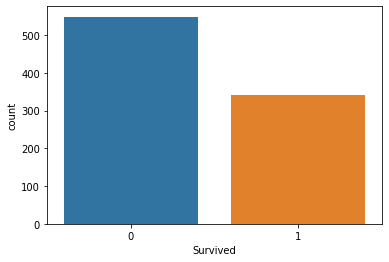

In [17]:
#Making the count plot for the 'Survived' column
sns.countplot('Survived' , data = titanic_data)

In [19]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


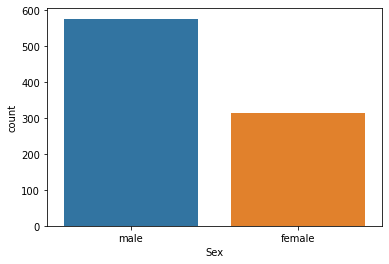

In [20]:
#Making the count plot for the same
sns.countplot('Sex' , data = titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


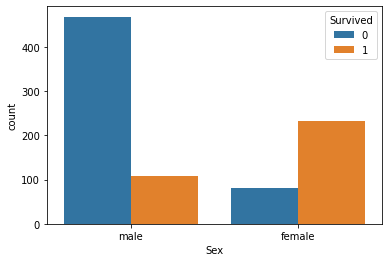

In [21]:
#Number of survivors gender wise
sns.countplot('Sex', hue='Survived' , data=titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


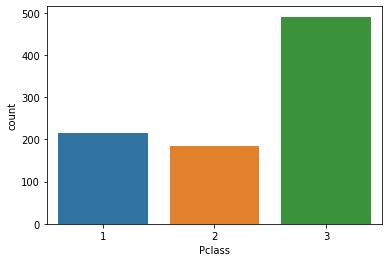

In [22]:
# Making a count plot for "Pclass" Column
sns.countplot('Pclass' , data = titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


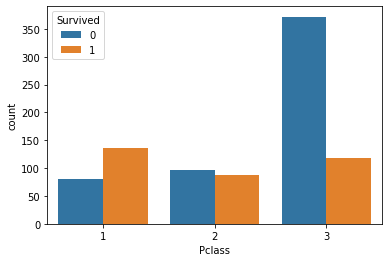

In [24]:
sns.countplot('Pclass', hue='Survived' , data=titanic_data)

Encoding the categorical columns

In [25]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [26]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
# Converting the categorical columns
titanic_data.replace({'Sex': {'male':0 , 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace=True)

In [28]:
titanic_data.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  ...            Ticket     Fare  Embarked
0              1         0       3  ...         A/5 21171   7.2500         0
1              2         1       1  ...          PC 17599  71.2833         1
2              3         1       3  ...  STON/O2. 3101282   7.9250         0
3              4         1       1  ...            113803  53.1000         0
4              5         0       3  ...            373450   8.0500         0
..           ...       ...     ...  ...               ...      ...       ...
886          887         0       2  ...            211536  13.0000         0
887          888         1       1  ...            112053  30.0000         0
888          889         0       3  ...        W./C. 6607  23.4500         0
889          890         1       1  ...            111369  30.0000         1
890          891         0       3  ...            370376   7.7500         2

[891 rows x 11 columns]>

Separating features and target

In [29]:
X = titanic_data.drop( columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = titanic_data['Survived']

In [30]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [31]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Splitting the dataset into the Training Set and Test Set

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2 , random_state = 0)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


Model Training 

Logistics Regression

In [39]:
model = LogisticRegression()

In [40]:
# Training the Logistics Regression model with the Training Data
model.fit(X_train, Y_train)

LogisticRegression()

In [41]:
# Training Data accuracy
X_train_prediction = model.predict(X_train)

In [42]:
print(X_train_prediction)

[1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 

In [48]:
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [44]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of the Training data : ', training_data_accuracy)

Accuracy score of the Training data :  0.8033707865168539


In [49]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of the Test data : ', test_data_accuracy)

Accuracy score of the Test data :  0.8044692737430168
